In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Cargar el dataset
def load_dataset():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
    df = pd.read_csv(url, delim_whitespace=True, names=column_names)
    return df

In [3]:
df = load_dataset()

# Descripción del dataset
print("Primeras filas del dataset:")
print(df.head())


C:\Users\DevRoger\AppData\Local\Temp\ipykernel_12356\1140736807.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=column_names)


Primeras filas del dataset:
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [4]:
# Manejo de valores faltantes
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print("Valores faltantes por columna antes de limpieza:")
print(df.isnull().sum())
df.fillna(df['horsepower'].median(), inplace=True)

Valores faltantes por columna antes de limpieza:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [5]:
# Eliminamos la columna 'car name'
df.drop(columns=['car name'], inplace=True)

In [6]:
# Convertir la variable 'origin' en variables dummy
df = pd.get_dummies(df, columns=['origin'], prefix='origin')

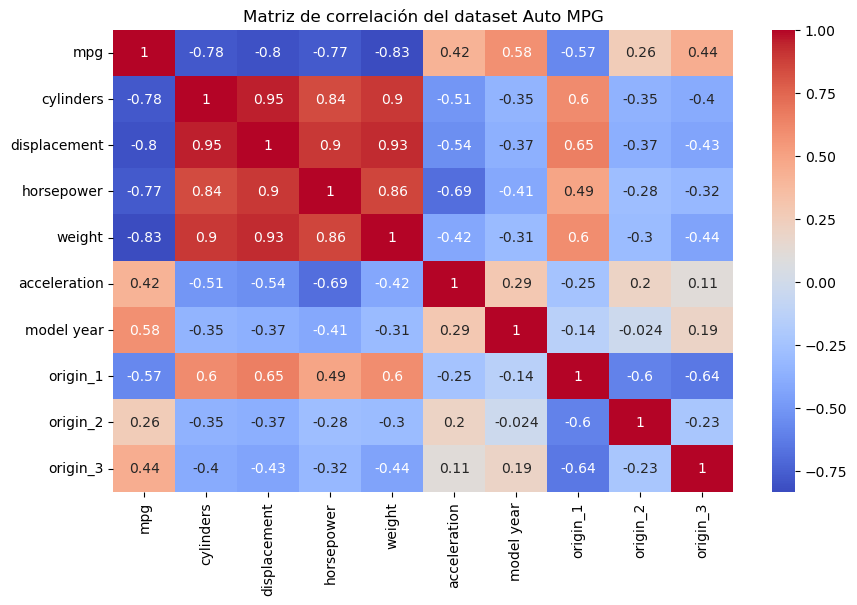

In [7]:
# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación del dataset Auto MPG")
plt.show()

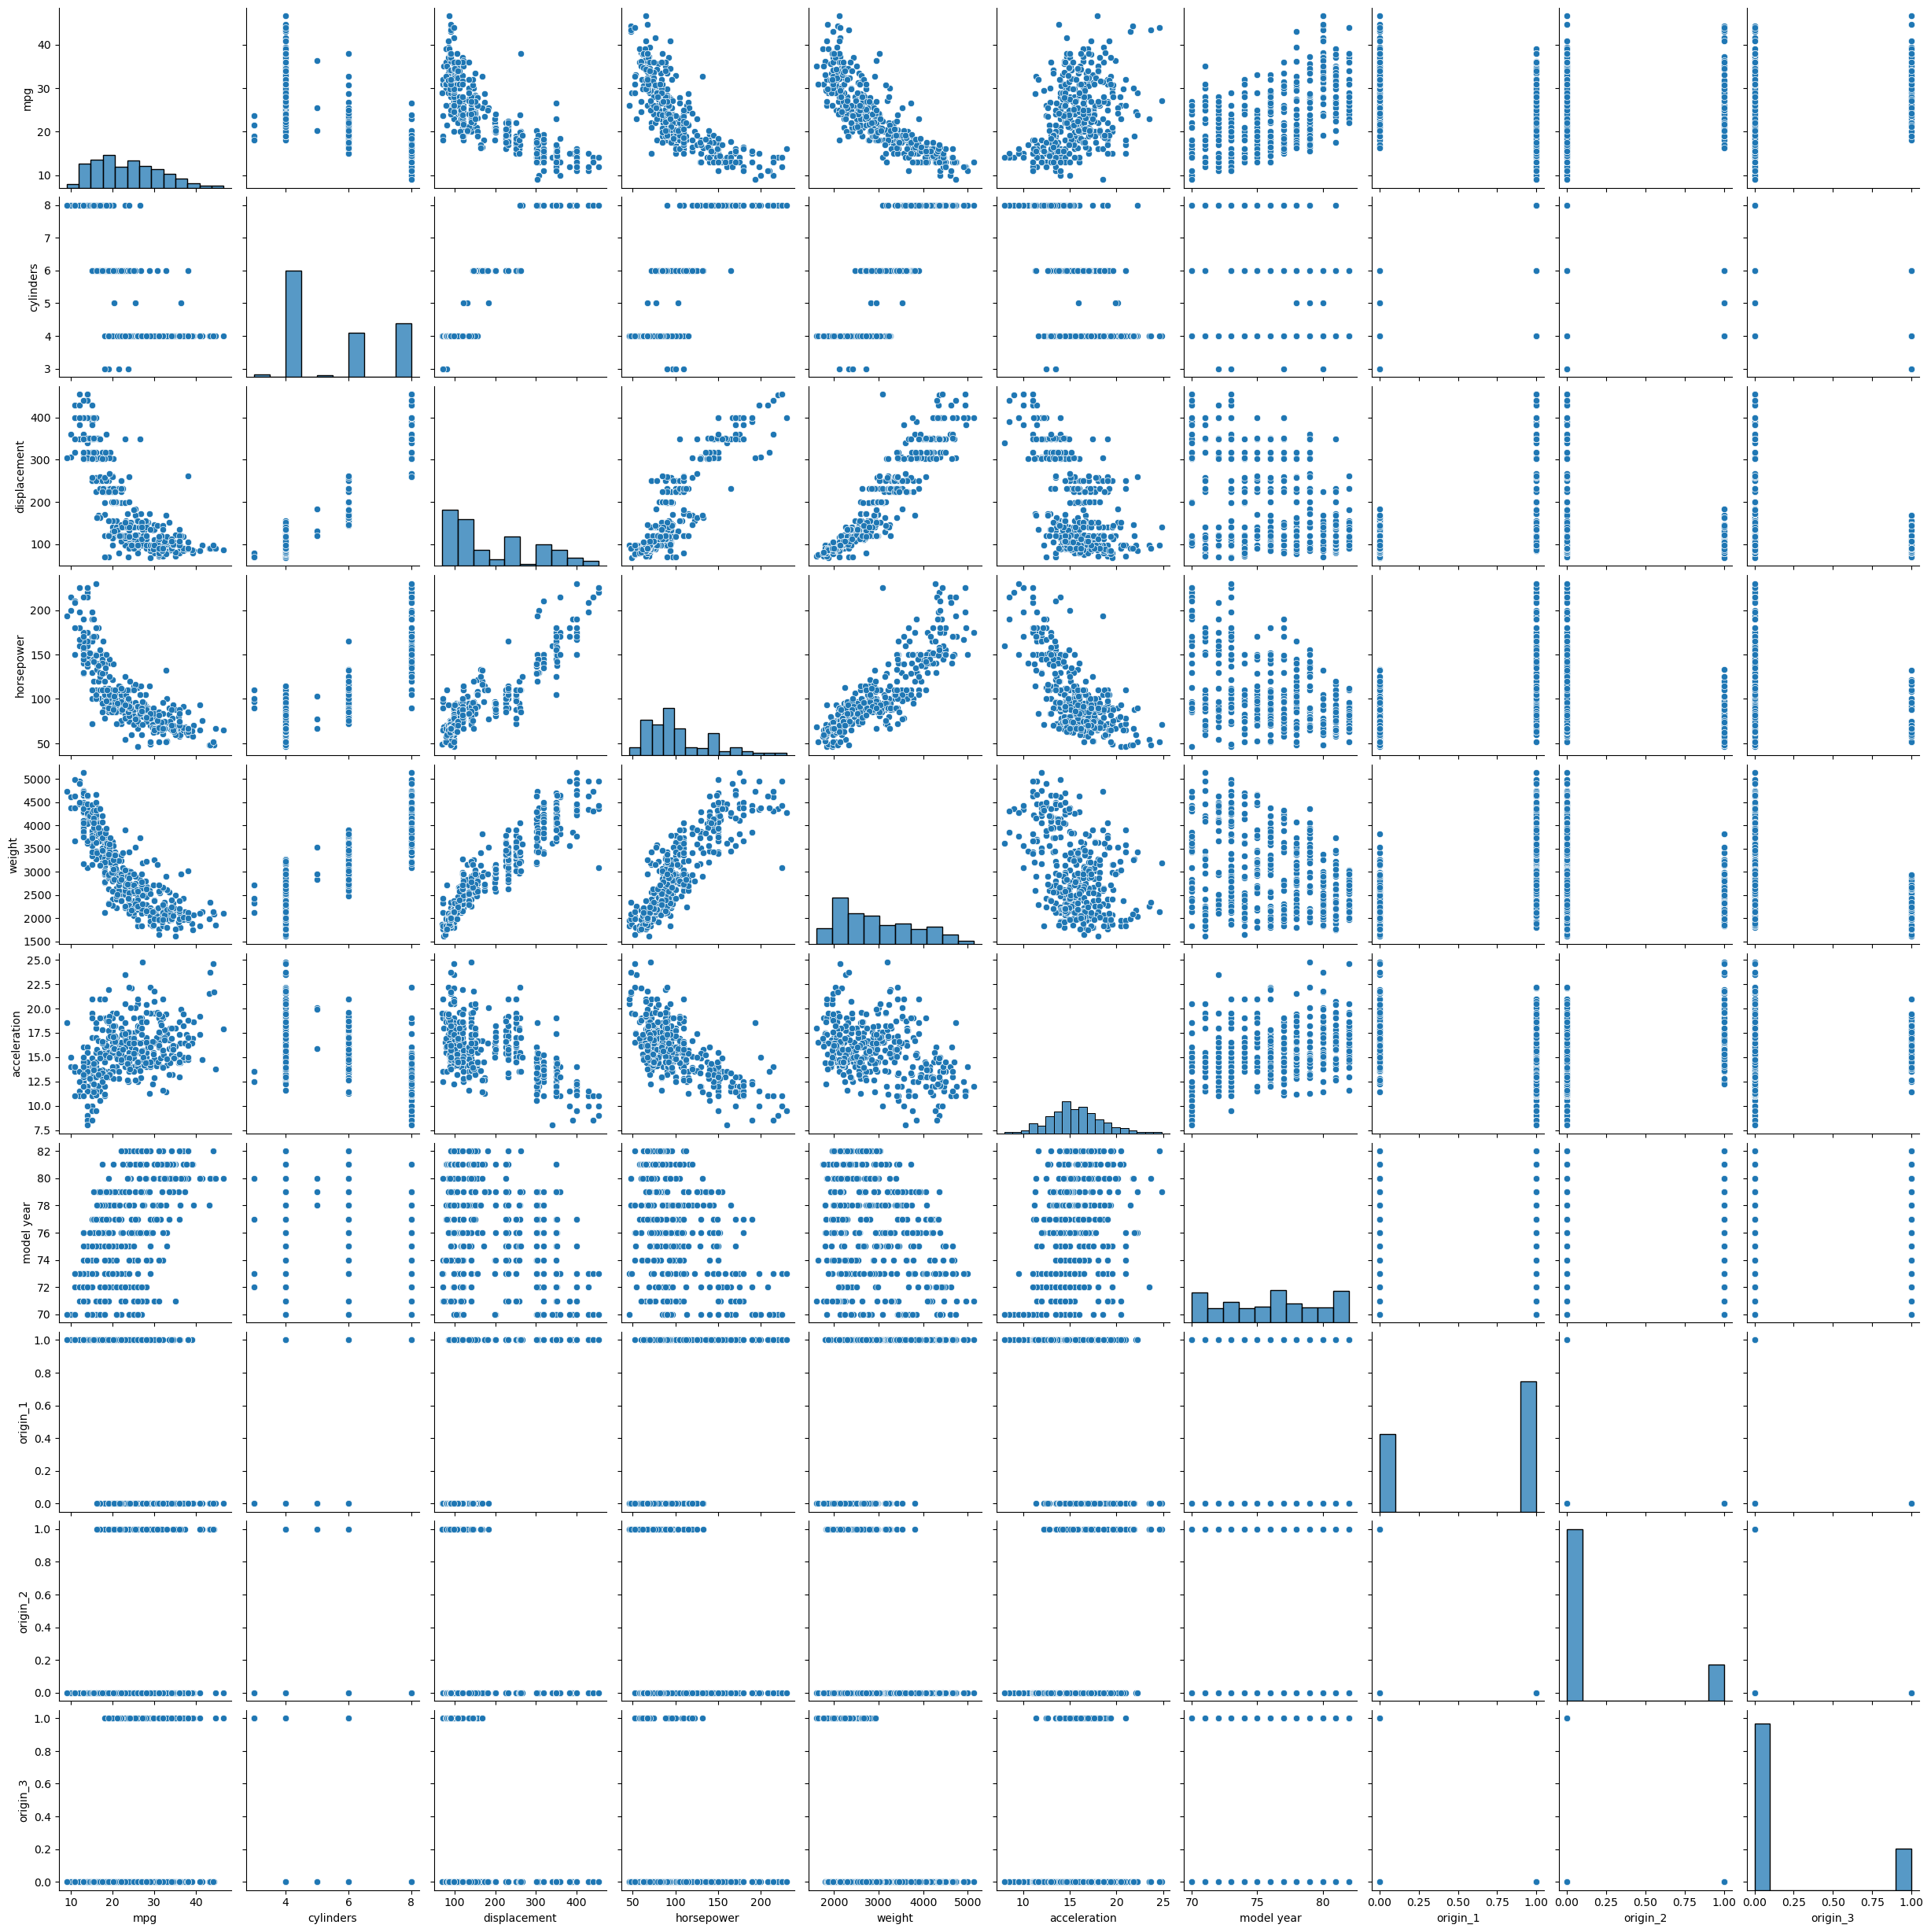

In [8]:
# Matriz de gráficos de dispersión
sns.pairplot(df)
plt.show()

In [9]:
# Normalización de los datos
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [10]:
# Separar la variable objetivo y las características
X = df_scaled.drop(columns=['mpg'])
y = df_scaled['mpg']

In [11]:
# Selección de características con SelectKBest
k_best = SelectKBest(score_func=f_regression, k=5)
X_new = k_best.fit_transform(X, y)
selected_features = X.columns[k_best.get_support()]
print("Características seleccionadas con SelectKBest:", selected_features)

Características seleccionadas con SelectKBest: Index(['cylinders', 'displacement', 'horsepower', 'weight', 'model year'], dtype='object')


In [12]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [13]:
# Entrenamiento del modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Predicciones y evaluación
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados del modelo de regresión lineal:")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Resultados del modelo de regresión lineal:
MAE (Error Absoluto Medio): 0.32
MSE (Error Cuadrático Medio): 0.16
R2 Score: 0.82


In [16]:
# Validación cruzada
cv_scores = cross_val_score(model, X_new, y, cv=5, scoring='neg_mean_squared_error')
print("Promedio de MSE con validación cruzada:", -np.mean(cv_scores))

Promedio de MSE con validación cruzada: 0.2574057452701426
